In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# listings = pd.read_csv('Listings.csv')
# this only returns UnicodeDecodeError, hence we have to specify encoding:
listings = pd.read_csv('Listings.csv', encoding='ISO-8859-1', low_memory=False)
# low_memory=False solves DtypeWarning of mixed tipes in columns

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
# cast any date columns as datetime format:
# most efficient way is to do it straight away when opening the csv:
listings = pd.read_csv(
    'Listings.csv',
    encoding='ISO-8859-1',
    low_memory=False,
    parse_dates=['host_since']
    )

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [6]:
# Filter the relevant rows and columns:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)


paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
# check for missing data, calculate the maximum, mininmum and average for each numeric column:
paris_listings.isna().sum()
# 33 rows are missing values - such a small number wont impact the analysis, so we can leave as they are
paris_listings.describe()
# there are rows with min value of 0 in price and accomodates, which is concerning
paris_listings.query('price == 0').count()
# 54 listings has accommodates = 0 and 62 listings has price = 0. All rows, where accommmodates is 0 has also price of 0.
# again it's just a small fragment of the data set so we leave it in.

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [ ]:
# let's prepare data for visualisation

In [8]:
# group by neighbourhoods
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [9]:
# most expensive neighbourhood in paris, group by accomodates and calculate average price
paris_listings_accommodations = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby('accommodates')
    .agg({'price':'mean'})
    .sort_values('price')
)

paris_listings_accommodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [10]:
# group listings by year (host since column), get number of new hosts and average price for each year
paris_listings_over_time = (
    paris_listings
    .set_index('host_since')
    .resample('Y')
    .agg({
        'neighbourhood':'count',
        'price': 'mean'
    })
)

paris_listings_over_time.head()

C:\Users\paula\AppData\Local\Temp\ipykernel_11868\166981267.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample('Y')


,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


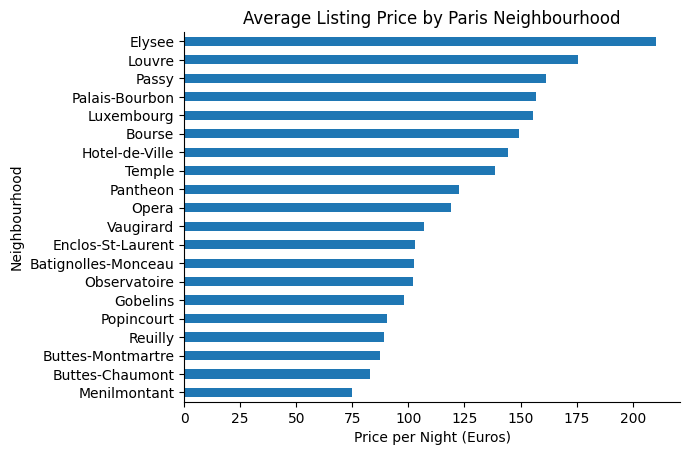

In [11]:
# visualisations:
# horizontal bar chart of the average price by neighbourhood in Paris
(paris_listings_neighbourhood
 .plot
 .barh(
     title='Average Listing Price by Paris Neighbourhood',
     xlabel='Price per Night (Euros)',
     ylabel='Neighbourhood',
     legend=None

 )
)
# to get rid of the border
sns.despine()

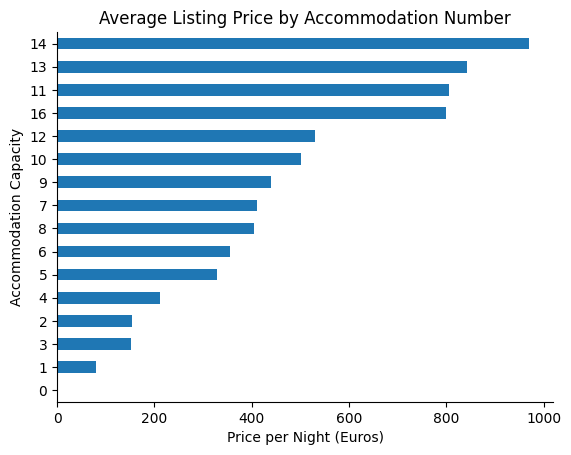

In [12]:
# horizontal bar chart of the average price by accommodates in most expensive Paris neighbourhood
(paris_listings_accommodations
 .plot
 .barh(
     title='Average Listing Price by Accommodation Number',
     xlabel='Price per Night (Euros)',
     ylabel='Accommodation Capacity',
     legend=None

 )
)

sns.despine()

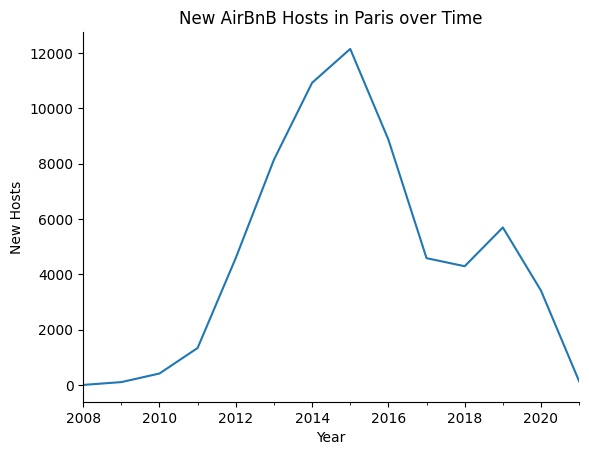

In [13]:
# two line charts, one of the count of new hosts over time and one for average price
paris_listings_over_time['neighbourhood'].plot(
    ylabel = 'New Hosts',
    xlabel = 'Year',
    title='New AirBnB Hosts in Paris over Time'
)

sns.despine()

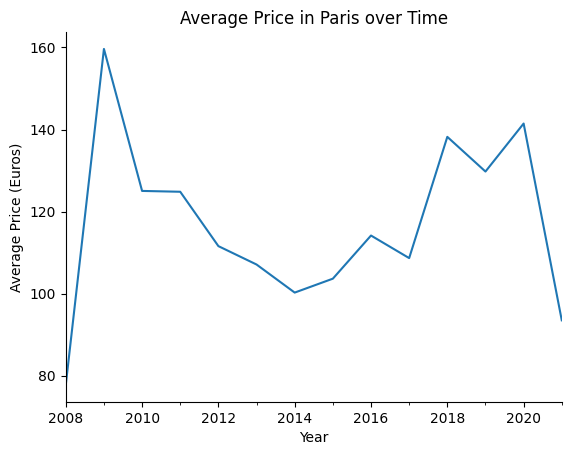

In [14]:
paris_listings_over_time['price'].plot(
    ylabel = 'Average Price (Euros)',
    xlabel='Year',
    title='Average Price in Paris over Time'
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

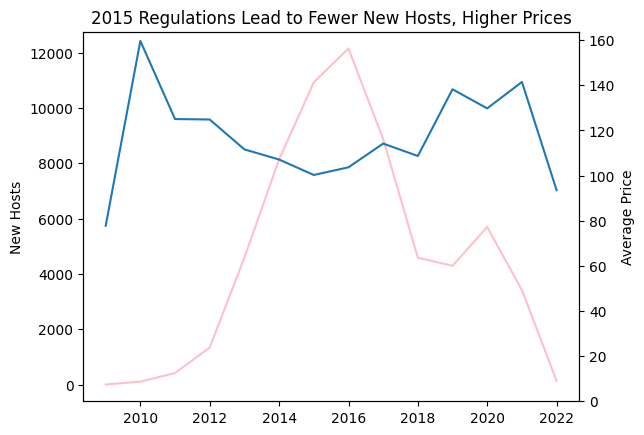

In [15]:
# get those two lines into one graph:
fig, ax = plt.subplots()
ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['neighbourhood'],
    label = 'New Hosts',
    c='pink'
)
ax.set_ylabel('New Hosts')

ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time['price'],
    label = 'Average Price'
)
ax2.set_ylabel('Average Price')
ax2.set_ylim(0)

ax.set_title('2015 Regulations Lead to Fewer New Hosts, Higher Prices')

